# Artificial Neural Network Algorithm to Predict Turbine Energy Yield for a Gas Turbine Sensor Data

## Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

# Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\16. Neural Networks-NN\gas_turbines.csv")

## Exploratory Data Analysis & Data Preprocessing

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.shape

(15039, 11)

In [5]:
# Check for null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
# Check for duplicate values
df[df.duplicated()].sum()

AT      0.0
AP      0.0
AH      0.0
AFDP    0.0
GTEP    0.0
TIT     0.0
TAT     0.0
TEY     0.0
CDP     0.0
CO      0.0
NOX     0.0
dtype: float64

In [7]:
# check for dtypes
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object


**No Duplicated vales**

**No missing values**

**All data types are float**

In [8]:
# check for unique numbers in datafrmae
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [9]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


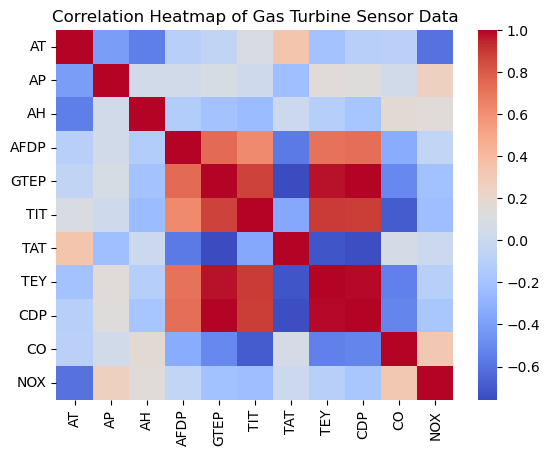

In [10]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Gas Turbine Sensor Data')
plt.show()

In [11]:
# Correlation Matrix of the data
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [12]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


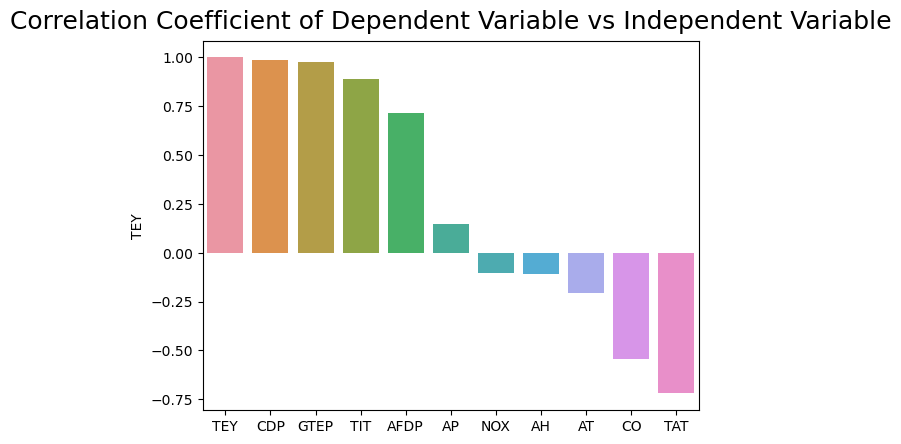

In [13]:
# Correlation between dependent and independent variables
plt.title("Correlation Coefficient of Dependent Variable vs Independent Variable", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)
plt.show()

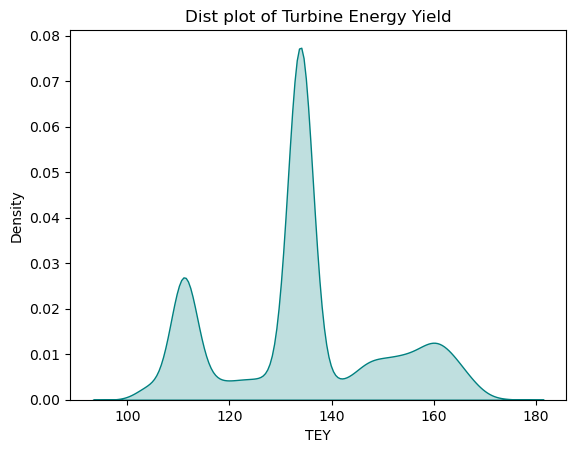

In [14]:
# Target Variable visualization by using distplot
import warnings
warnings.filterwarnings('ignore')
sns.kdeplot(data=df['TEY'], shade=True, color='teal')

plt.title('Dist plot of Turbine Energy Yield')
plt.show()

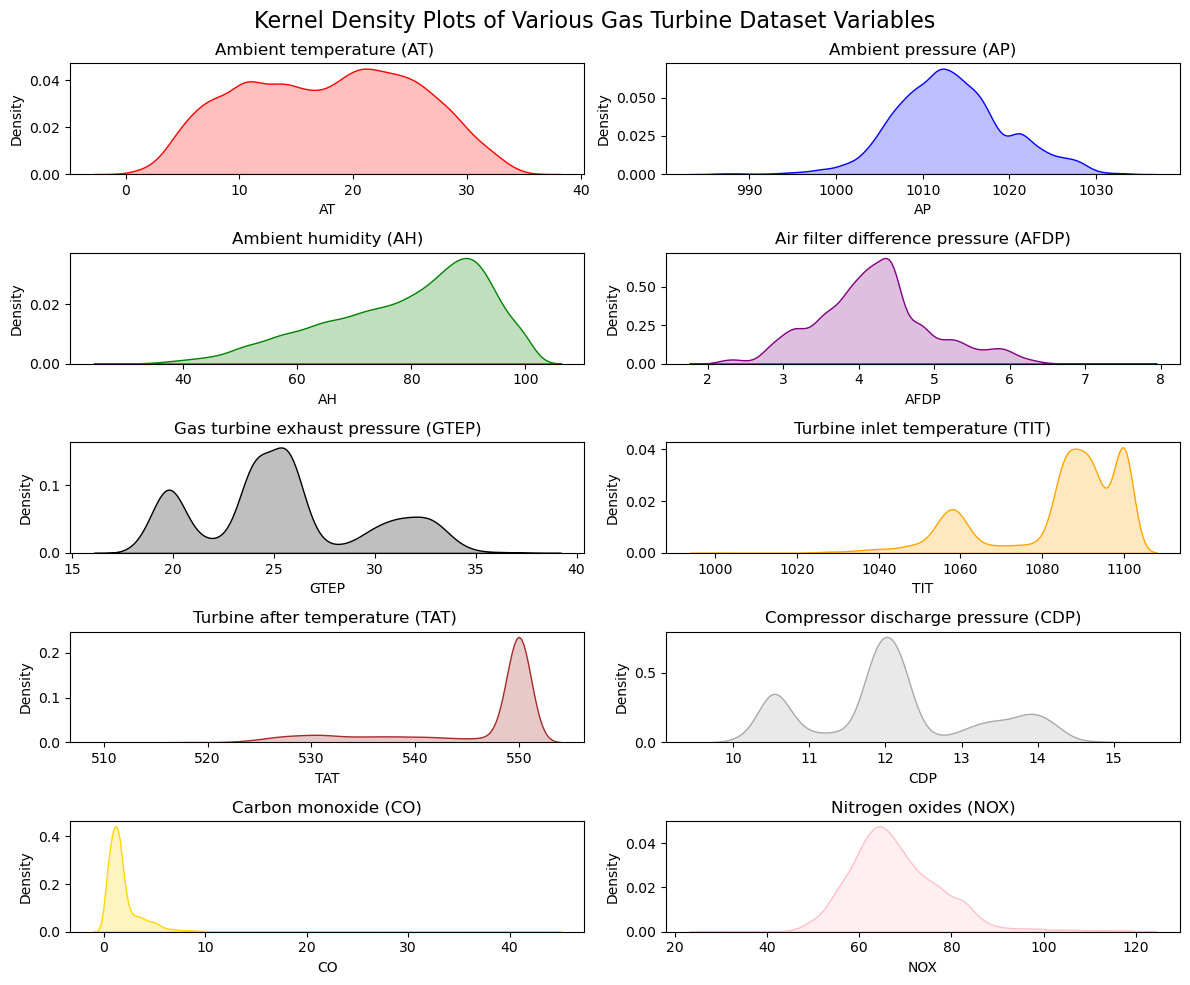

In [15]:
#Creating Subplots to visualize independent variables data
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))

#Plot KDE plots
sns.kdeplot(ax=axes[0,0], data=df['AT'], shade=True, color='red')
sns.kdeplot(ax=axes[0,1], data=df['AP'], shade=True, color='blue')
sns.kdeplot(ax=axes[1,0], data=df['AH'], shade=True, color='green')
sns.kdeplot(ax=axes[1,1], data=df['AFDP'], shade=True, color='purple')
sns.kdeplot(ax=axes[2,0], data=df['GTEP'], shade=True, color='black')
sns.kdeplot(ax=axes[2,1], data=df['TIT'], shade=True, color='orange')
sns.kdeplot(ax=axes[3,0], data=df['TAT'], shade=True, color='brown')
sns.kdeplot(ax=axes[3,1], data=df['CDP'], shade=True, color='darkgrey')
sns.kdeplot(ax=axes[4,0], data=df['CO'], shade=True, color='gold')
sns.kdeplot(ax=axes[4,1], data=df['NOX'], shade=True, color='pink')



#Set plot titles and labels
axes[0,0].set_title('Ambient temperature (AT) ')
axes[0,1].set_title('Ambient pressure (AP)')
axes[1,0].set_title('Ambient humidity (AH)')
axes[1,1].set_title('Air filter difference pressure (AFDP)')
axes[2,0].set_title('Gas turbine exhaust pressure (GTEP)')
axes[2,1].set_title('Turbine inlet temperature (TIT)')
axes[3,0].set_title('Turbine after temperature (TAT) ')
axes[3,1].set_title('Compressor discharge pressure (CDP)')
axes[4,0].set_title('Carbon monoxide (CO)')
axes[4,1].set_title('Nitrogen oxides (NOX)')


fig.suptitle('Kernel Density Plots of Various Gas Turbine Dataset Variables', fontsize=16)
plt.tight_layout()
plt.show()



# Key Insights from the above KDE plot:
### Ambient Pressure (AP), Air Filter Difference Pressure (AFDP) & Nitrogen Oxides(NOx) follows normal distribution the shape of the curve looks like a bell curve.
### Remaining variables are not normally distributed

## Check for outliers

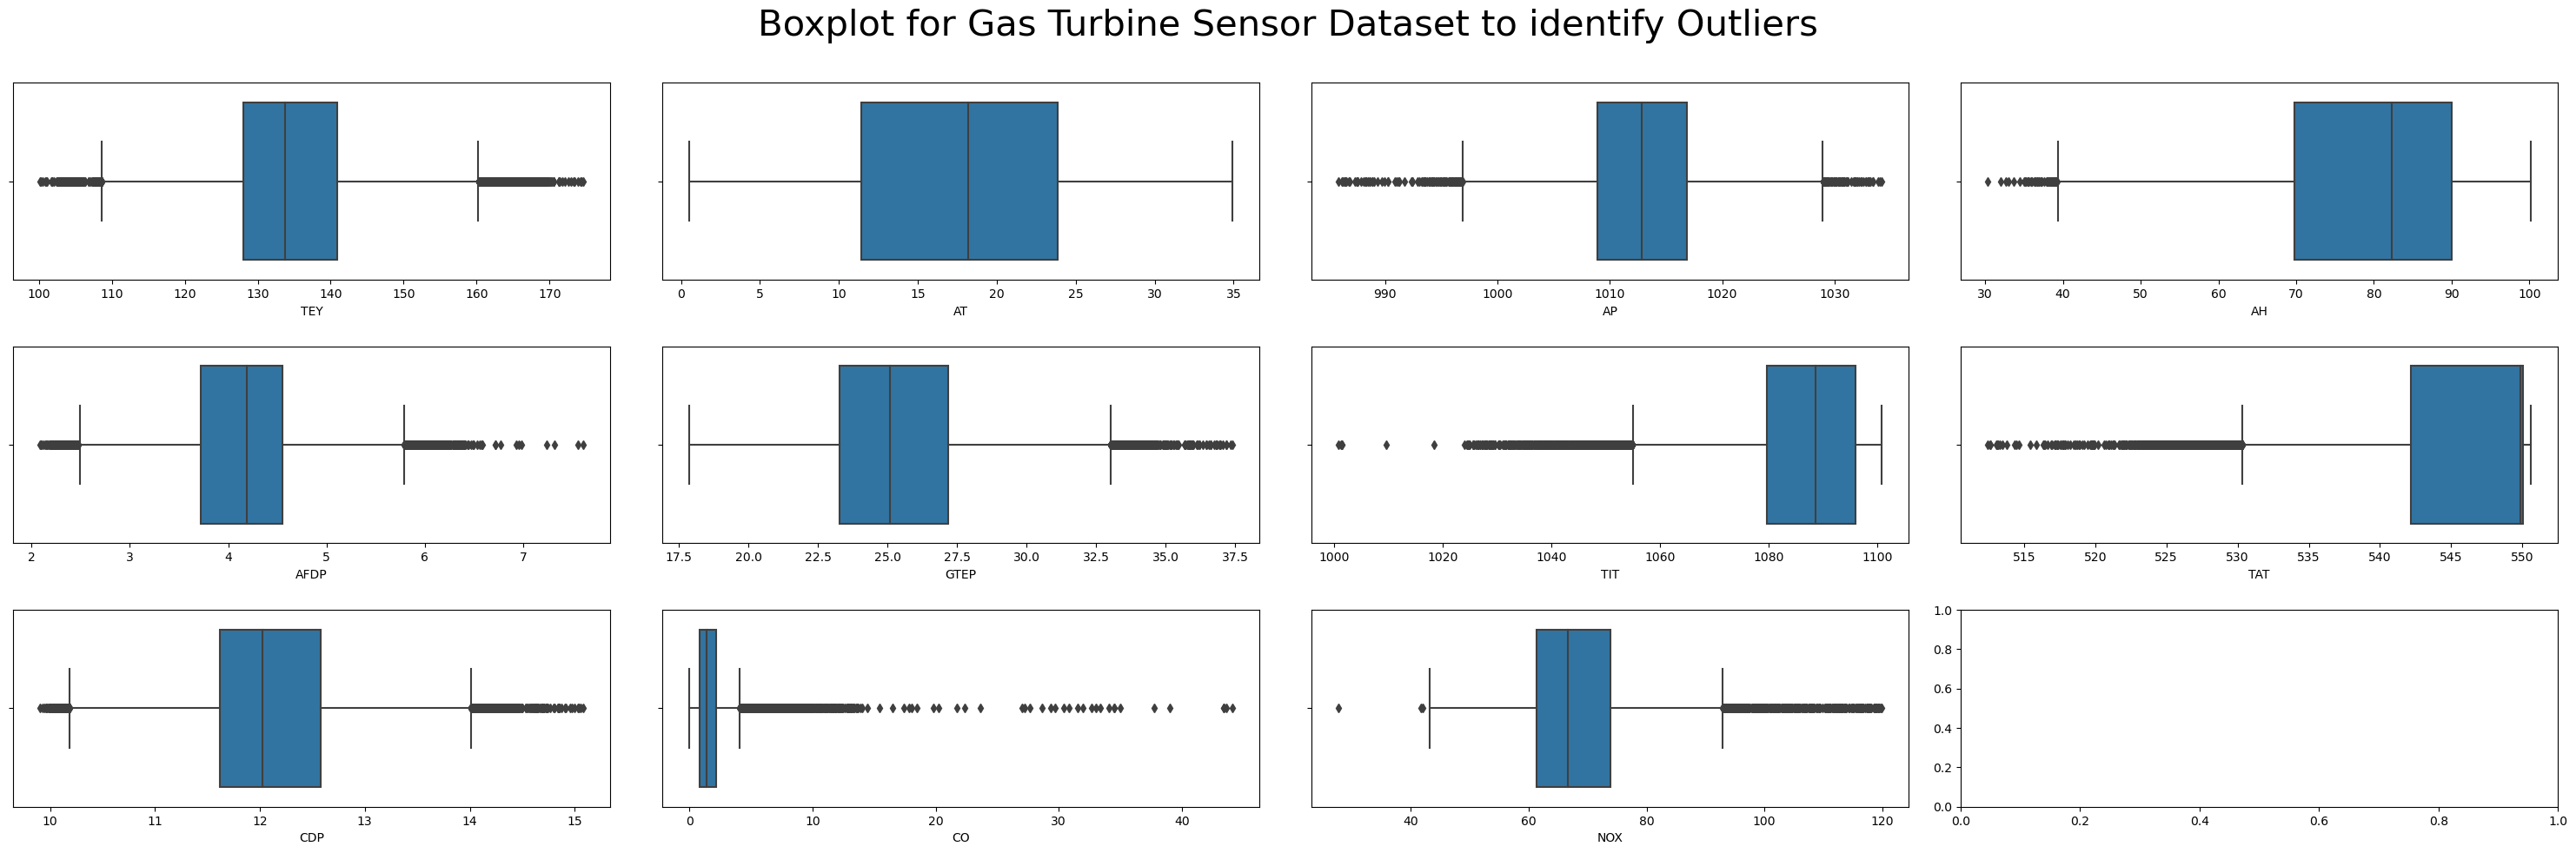

In [16]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(30,10), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Gas Turbine Sensor Dataset to identify Outliers", fontsize= 30, y = 0.99)
plt.tight_layout(pad=2.0)

## Key Insights:
### From the above box plot we can see that the data is having outliers

### Lets transform the data 

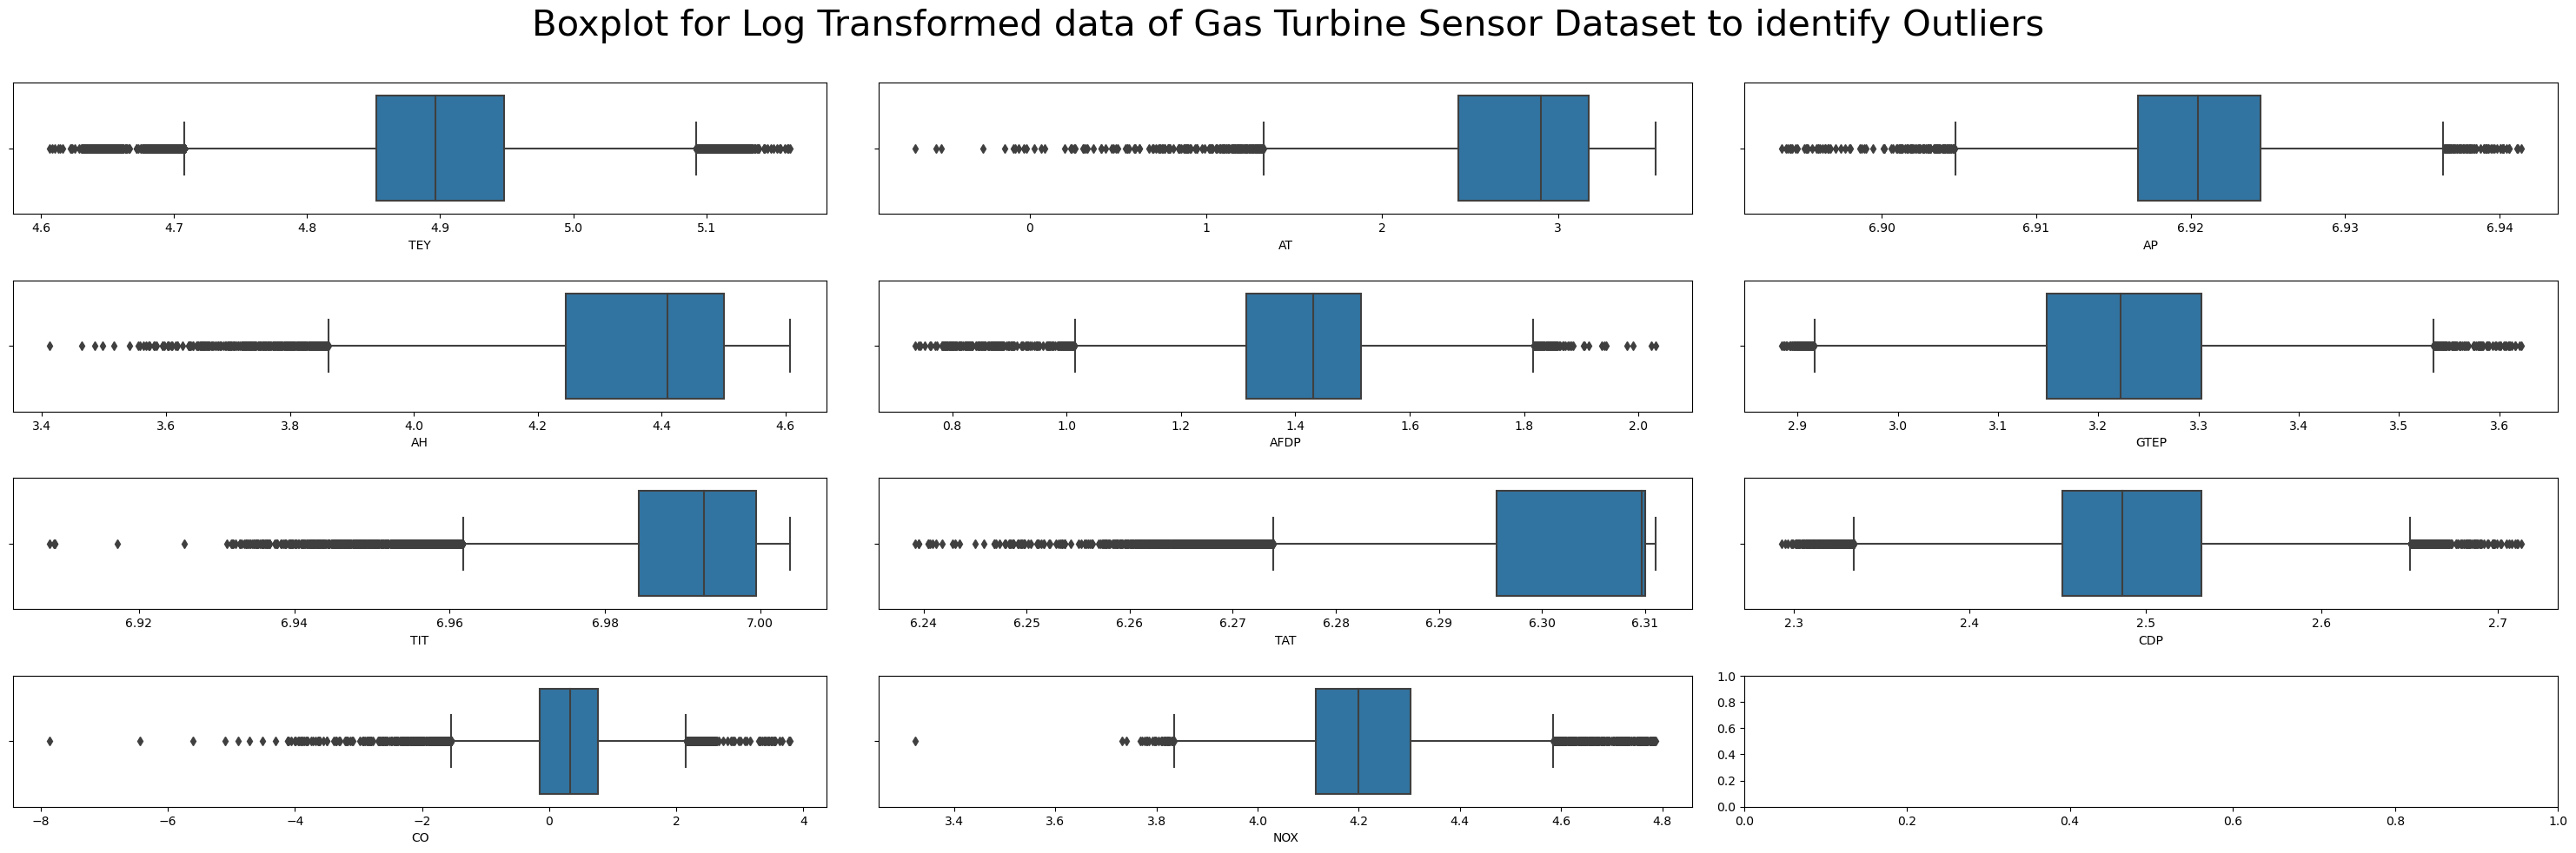

In [17]:
# Outliers detection with logartihmic transformation
fig, ax=plt.subplots(4,3, figsize=(30,10), sharex= False, sharey = False)
sns.boxplot(np.log(df.TEY), ax=ax[0,0])
sns.boxplot(np.log(df.AT), ax=ax[0,1])
sns.boxplot(np.log(df.AP), ax=ax[0,2])
sns.boxplot(np.log(df.AH), ax=ax[1,0])
sns.boxplot(np.log(df.AFDP), ax=ax[1,1])
sns.boxplot(np.log(df.GTEP), ax=ax[1,2])
sns.boxplot(np.log(df.TIT), ax=ax[2,0])
sns.boxplot(np.log(df.TAT), ax=ax[2,1])
sns.boxplot(np.log(df.CDP), ax=ax[2,2])
sns.boxplot(np.log(df.CO), ax=ax[3,0])
sns.boxplot(np.log(df.NOX), ax=ax[3,1])
plt.suptitle("Boxplot for Log Transformed data of Gas Turbine Sensor Dataset to identify Outliers", fontsize= 30, y = 0.99)
plt.tight_layout(pad=2.0)

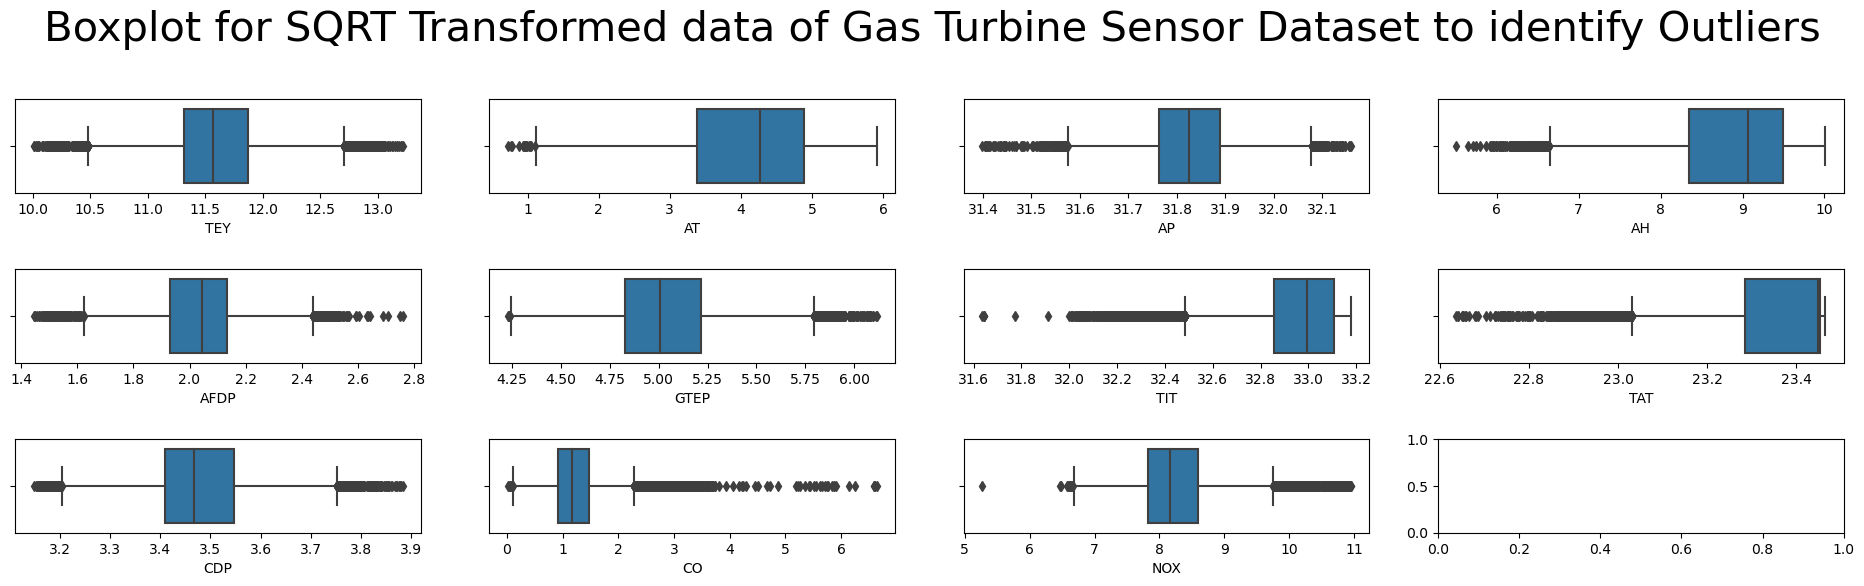

In [18]:
# Outlier detection with Squareroot transformation
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(df.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(df.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(df.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(df.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(df.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(df.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(df.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(df.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(df.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(df.NOX), ax=ax[2,2])
plt.suptitle("Boxplot for SQRT Transformed data of Gas Turbine Sensor Dataset to identify Outliers", fontsize= 30, y = 0.99)
plt.tight_layout(pad=2.0)

## With the help of data transformation still we can see the outliers

In [19]:
# finding outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]

In [20]:
print(outliers.shape)
outliers

(16, 12)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


## we have 16 outliers in the data set

In [21]:
print('Shape of the data with outlier data', df.shape)


Shape of the data with outlier data (15039, 11)


In [22]:
#drop the outliers
df = df.drop(outliers.index)
print('Shape of the data after removing outliers', df.shape)

Shape of the data after removing outliers (15023, 11)


In [23]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## Feature Selection

In [24]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature extraction
x=df.drop('TEY', axis=1)
y=df['TEY']
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)
# summarize scores
scores = fit.scores_

features = fit.transform(x)
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712026,CDP
4,1.599082,GTEP
5,1.323570,TIT
6,0.896707,TAT
3,0.659512,AFDP
8,0.510788,CO
0,0.412331,AT
9,0.299756,NOX
1,0.140229,AP
2,0.097734,AH


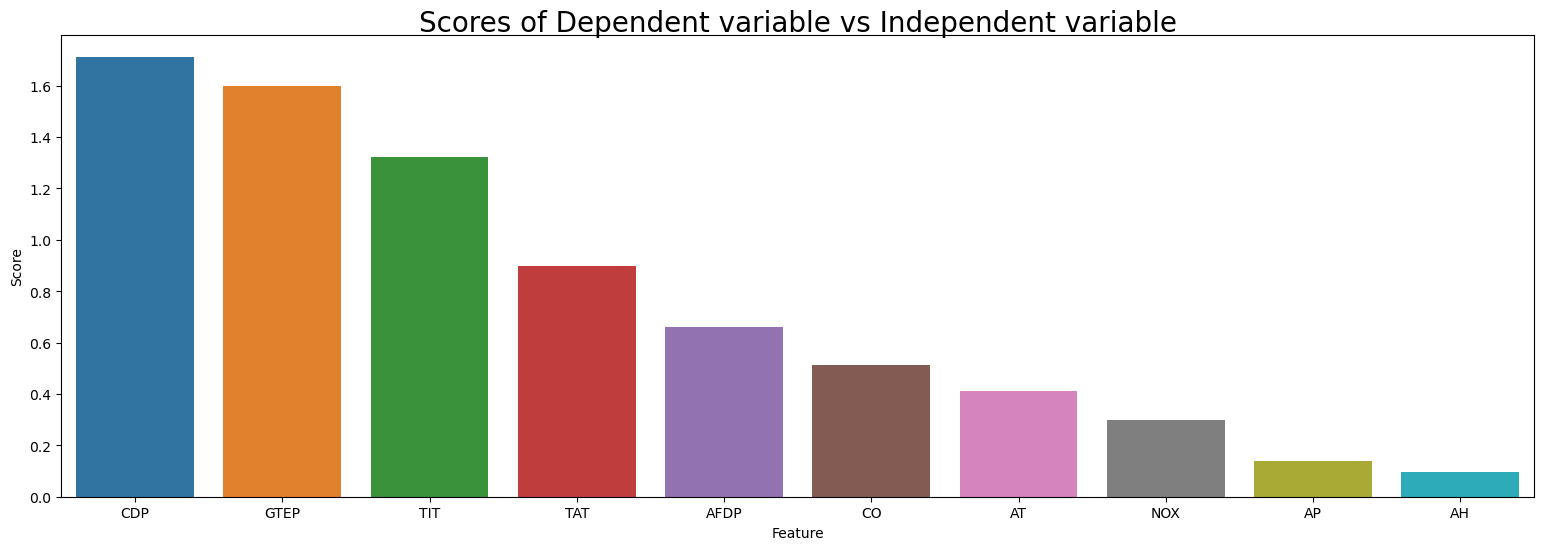

In [25]:
# Plotting Best scores
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='Feature', y='Score', data=score_df.sort_values(by='Score', ascending=False))
plt.title("Scores of Dependent variable vs Independent variable", fontsize=20, y=0.99)
plt.show()

 The above score we can see that the NOX, AP, AH are having low scores

In [26]:
data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [27]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [28]:
df_standard_scaled = data.copy()
features = df_standard_scaled[continuous_feature]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.359605,-1.381262,-1.501236,0.584296,-0.923012,0.558318,-1.442277,-1.234002
1,-1.365954,-1.365681,-1.495148,0.584296,-0.923275,0.596348,-1.452107,-1.232737
2,-1.363233,-1.353456,-1.489061,0.567731,-0.946177,0.579990,-1.437217,-1.233369
3,-1.358698,-1.350340,-1.476885,0.583021,-0.948678,0.575842,-1.416183,-1.232737
4,-1.353256,-1.356812,-1.470797,0.581747,-0.926171,0.601987,-1.371142,-1.232737


In [30]:
df_standard_scaled.shape

(15023, 8)

In [31]:
# Define X and Y variables
X=df_standard_scaled.drop('TEY', axis=1)
X=X.values

In [32]:
Y=df_standard_scaled['TEY']
Y=Y.values

In [33]:
X

array([[-1.35960456, -1.38126228, -1.50123609, ..., -0.92301173,
         0.55831849, -1.44227724],
       [-1.36595354, -1.36568104, -1.49514835, ..., -0.92327497,
         0.59634782, -1.45210723],
       [-1.36323255, -1.35345575, -1.48906061, ..., -0.94617727,
         0.57998962, -1.43721691],
       ...,
       [-1.47025823, -1.4131439 , -2.81010032, ..., -0.95328488,
         2.7992998 , -1.38872758],
       [-1.42490836, -1.44981976, -2.47527458, ..., -0.99066564,
         2.00059048, -1.42290794],
       [-1.3795585 , -1.46683927, -2.06739597, ..., -1.01843797,
         1.40973759, -1.43322678]])

In [34]:
Y

array([-1.23400158, -1.23273695, -1.23336926, ..., -1.51917554,
       -1.48439823, -1.43128379])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Split the data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.30,random_state=3)



In [36]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(10516, 7) (4507, 7) (10516,) (4507,)


In [37]:
!pip install tensorflow

In [38]:
!pip install keras

## Building ANN model

In [39]:
# Creating a Multi Layer Perceptron
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU') 
#using GPU for faster processing of model

from keras.wrappers.scikit_learn import KerasClassifier


In [40]:
#assigning predictor variables to x and response variable to y
x = data.drop('TEY', axis=1)
y = data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

(12018, 7)
(3005, 7)
(12018, 1)
(3005, 1)


In [87]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
history=model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)
accuracy

Epoch 1/100
169/169 [==============================] - 3s 6ms/step - loss: 17593.0449 - mae: 131.6891 - mse: 17593.0449 - accuracy: 0.0000e+00 - val_loss: 16746.0176 - val_mae: 128.4274 - val_mse: 16746.0176 - val_accuracy: 0.0000e+00
Epoch 2/100
169/169 [==============================] - 1s 4ms/step - loss: 16244.1826 - mae: 126.4705 - mse: 16244.1826 - accuracy: 0.0000e+00 - val_loss: 15693.9326 - val_mae: 124.2636 - val_mse: 15693.9326 - val_accuracy: 0.0000e+00
Epoch 3/100
169/169 [==============================] - 1s 4ms/step - loss: 15269.7471 - mae: 122.5597 - mse: 15269.7471 - accuracy: 0.0000e+00 - val_loss: 14776.9580 - val_mae: 120.5175 - val_mse: 14776.9580 - val_accuracy: 0.0000e+00
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 14386.5264 - mae: 118.9039 - mse: 14386.5264 - accuracy: 0.0000e+00 - val_loss: 13925.9824 - val_mae: 116.9337 - val_mse: 13925.9824 - val_accuracy: 0.0000e+00
Epoch 5/100
169/169 [==============================] - 1s 3m

169/169 [==============================] - 1s 4ms/step - loss: 993.8882 - mae: 27.3882 - mse: 993.8882 - accuracy: 0.0000e+00 - val_loss: 930.3154 - val_mae: 26.1533 - val_mse: 930.3154 - val_accuracy: 0.0000e+00
Epoch 37/100
169/169 [==============================] - 1s 4ms/step - loss: 880.4017 - mae: 25.3057 - mse: 880.4017 - accuracy: 0.0000e+00 - val_loss: 823.8260 - val_mae: 24.1575 - val_mse: 823.8260 - val_accuracy: 0.0000e+00
Epoch 38/100
169/169 [==============================] - 1s 4ms/step - loss: 779.2357 - mae: 23.4721 - mse: 779.2357 - accuracy: 0.0000e+00 - val_loss: 729.5616 - val_mae: 22.5387 - val_mse: 729.5616 - val_accuracy: 0.0000e+00
Epoch 39/100
169/169 [==============================] - 1s 4ms/step - loss: 689.6588 - mae: 22.0429 - mse: 689.6588 - accuracy: 0.0000e+00 - val_loss: 646.1180 - val_mae: 21.2591 - val_mse: 646.1180 - val_accuracy: 0.0000e+00
Epoch 40/100
169/169 [==============================] - 1s 4ms/step - loss: 611.1125 - mae: 20.8037 - mse: 61

169/169 [==============================] - 1s 3ms/step - loss: 12.6824 - mae: 1.6590 - mse: 12.6824 - accuracy: 0.0000e+00 - val_loss: 11.0957 - val_mae: 1.6279 - val_mse: 11.0957 - val_accuracy: 0.0000e+00
Epoch 73/100
169/169 [==============================] - 1s 3ms/step - loss: 10.2885 - mae: 1.5041 - mse: 10.2885 - accuracy: 0.0000e+00 - val_loss: 8.9079 - val_mae: 1.4391 - val_mse: 8.9079 - val_accuracy: 0.0000e+00
Epoch 74/100
169/169 [==============================] - 1s 3ms/step - loss: 8.3703 - mae: 1.3624 - mse: 8.3703 - accuracy: 0.0000e+00 - val_loss: 7.1799 - val_mae: 1.2967 - val_mse: 7.1799 - val_accuracy: 0.0000e+00
Epoch 75/100
169/169 [==============================] - 1s 3ms/step - loss: 6.8478 - mae: 1.2488 - mse: 6.8478 - accuracy: 0.0000e+00 - val_loss: 5.8218 - val_mae: 1.1712 - val_mse: 5.8218 - val_accuracy: 0.0000e+00
Epoch 76/100
169/169 [==============================] - 1s 3ms/step - loss: 5.6428 - mae: 1.1554 - mse: 5.6428 - accuracy: 0.0000e+00 - val_los

In [42]:
# hyperparameter tuning 
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 987us/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.675943
dtype: float64
94/94 [==============================] - 0s 913us/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.557088
dtype: float64
94/94 [==============================] - 0s 953us/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.64138
dtype: float64
94/94 [==============================] - 0s 839us/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.636042
dtype: float64
94/94 [==============================] - 0s 672us/step
batch_size: 10 - epochs: 5 Accuracy: TEY    80.802774
dtype: float64
94/94 [==============================] - 0s 840us/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.312819
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.649522
dtype: float64
94/94 [==============================] - 0s 840us/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.62847
dtype: float64
94/94 [=

,batchsize,epochs,Accuracy
0,5,5,TEY 97.675943 dtype: float64
0,5,10,TEY 99.557088 dtype: float64
0,5,50,TEY 99.64138 dtype: float64
0,5,100,TEY 99.636042 dtype: float64
0,10,5,TEY 80.802774 dtype: float64
0,10,10,TEY 98.312819 dtype: float64
0,10,50,TEY 99.649522 dtype: float64
0,10,100,TEY 99.62847 dtype: float64
0,15,5,TEY 58.546299 dtype: float64
0,15,10,TEY 89.722357 dtype: float64


In [43]:
finalParamTable['Accuracy']=finalParamTable['Accuracy'].astype(float)

In [44]:
# getting corresponding row values of the maximum value of 'Accuracy' column
finalParamTable = finalParamTable.reset_index()
#print(finalParamTable_1)
#print(finalParamTable['Accuracy'].idxmax())
finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

index          0.000000
batchsize     20.000000
epochs       100.000000
Accuracy      99.670691
Name: 15, dtype: float64

## Training Model with best parameters

In [79]:
model = Sequential()
model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['accuracy', 'mae','mse'])
model.fit(x_train_scaled, y_train , batch_size=20, epochs=100,  verbose=0)
MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))
print( 'Accuracy:',100-MAPE)


94/94 [==============================] - 0s 1ms/step
Accuracy: TEY    99.666152
dtype: float64


### Model Evaluation & Training and Testing Error

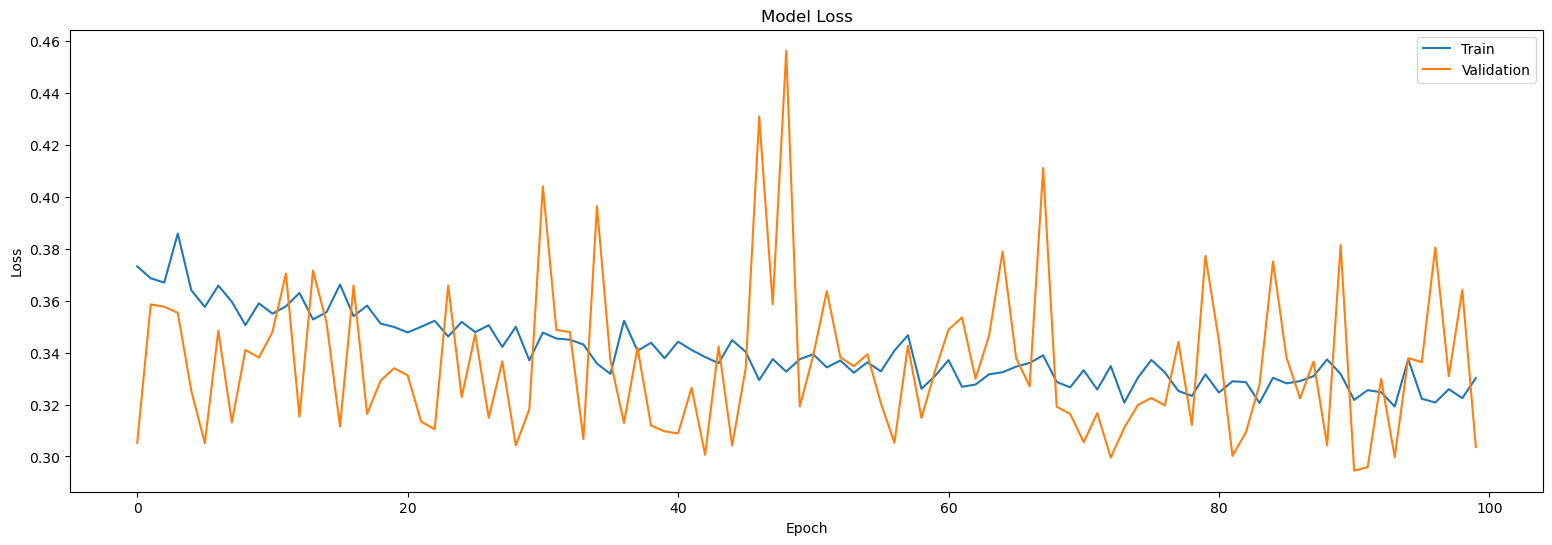

In [83]:
history = model.fit(x_train_scaled, y_train, batch_size=20, epochs=100, verbose=0, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


## Conclusion:
##  I have successfully created an ANN model.
## ~The data transformed to make it normal by using Standard Scaler
## ~Outliers Removed
## ~Feature Selection done using SelectKBest scores
## ~Developed an ANN model with training dataset
## ~Hyper parameter tuning model created to find best hyper parameters
## ~Created final model with best hyperparameters, the model has achieved the accuracy of 99.66%